## Convolutional AutoEncoder Classifier

This network will consist of the same encoder as used before but the head will classify the images into the number that they represent.

## Imports

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

## Device Agnostic Code

In [2]:
try:
    device = 'mps' if torch.backends.mps.is_available() else 'cpu'
except:
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Loading the dataset

In [3]:
# Transforms images to a PyTorch tensor
tensor_transform = transforms.ToTensor()

# Download the MNIST Dataset
dataset = datasets.MNIST(root='./data',
                        train=True,
                        download=True,
                        transform=tensor_transform)

# DataLoader is used to load the dataset for training
loader = torch.utils.data.DataLoader(dataset=dataset,
                                    batch_size=20,
                                    shuffle=True)

## Visualise the data

(20, 1, 28, 28)


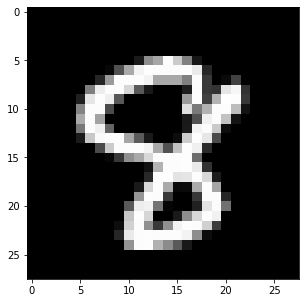

In [4]:
# Get a batch
dataiter = iter(loader)
images, labels = next(dataiter)
images = images.numpy()
print(images.shape)

# Plot an image
img = np.squeeze(images[0])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

## Autoencoder

In [33]:
class AE(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Encoder 1 ==> 16 ==> 2
        self.encode = nn.Sequential(
            nn.Conv2d(1, 16, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(16, 4, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        
        
        # Decoder 2 ==> 16 == > 1
        self.decode = nn.Sequential(
            nn.Flatten(),
            nn.Linear(196, 64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,10),
            nn.LogSoftmax()
        )
        
    def forward(self, x):
        code = self.encode(x)
        decode = self.decode(code)
        return decode
    
model = AE()

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

# Specify loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training the model

In [37]:
epochs = 30
outputs = []
losses = []

# Transfer model to device
model.to(device)

for epoch in range(epochs):
    # Reset train loss
    train_loss = 0.0
    for (image, target) in loader:
        # Move data to device
        image = image.to(device)
        target = target.to(device)
        
        # Forward pass
        output = model(image)
        loss = loss_fn(output, target)
        
        optimizer.zero_grad()
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        # Calculate batch loss
        train_loss += loss.item()*image.size(0)
    
    train_loss = train_loss/len(loader)
    losses.append(train_loss)
    outputs.append((epochs, image, output))
    print(f'Epoch: {epoch} \tTraining Loss: {train_loss:.6f}')

Epoch: 0 	Training Loss: 6.183059
Epoch: 1 	Training Loss: 2.152742
Epoch: 2 	Training Loss: 1.618796
Epoch: 3 	Training Loss: 1.315624
Epoch: 4 	Training Loss: 1.128077
Epoch: 5 	Training Loss: 0.939656
Epoch: 6 	Training Loss: 0.850548
Epoch: 7 	Training Loss: 0.759624
Epoch: 8 	Training Loss: 0.679806
Epoch: 9 	Training Loss: 0.638253
Epoch: 10 	Training Loss: 0.554864
Epoch: 11 	Training Loss: 0.528934
Epoch: 12 	Training Loss: 0.467707
Epoch: 13 	Training Loss: 0.453620
Epoch: 14 	Training Loss: 0.455345
Epoch: 15 	Training Loss: 0.405918
Epoch: 16 	Training Loss: 0.370667
Epoch: 17 	Training Loss: 0.360734
Epoch: 18 	Training Loss: 0.355192
Epoch: 19 	Training Loss: 0.304531
Epoch: 20 	Training Loss: 0.313923
Epoch: 21 	Training Loss: 0.306428
Epoch: 22 	Training Loss: 0.261841
Epoch: 23 	Training Loss: 0.275268
Epoch: 24 	Training Loss: 0.267221
Epoch: 25 	Training Loss: 0.265010
Epoch: 26 	Training Loss: 0.251989
Epoch: 27 	Training Loss: 0.218634
Epoch: 28 	Training Loss: 0.21

Text(0.5, 0, 'Epoch')

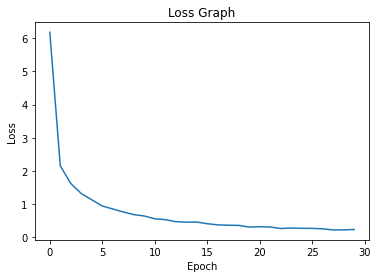

In [47]:
plt.plot(losses)
plt.title('Loss Graph')
plt.ylabel('Loss')
plt.xlabel('Epoch')

## Model Testing

tensor(8, device='cuda:0')


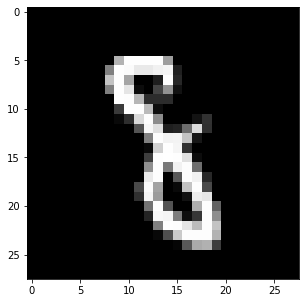

In [46]:
# Download the MNIST Test Dataset
dataset = datasets.MNIST(root='./data',
                        train=False,
                        download=True,
                        transform=tensor_transform)
dataiter = iter(loader)
images, labels = next(dataiter)
print(model(images.to(device))[0].argmax())
images_np = images.numpy()

# Plot an image
img = np.squeeze(images_np[0])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')